# Monte Carlo methods: basic introduction

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the free [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>

---

This notebook contains an introduction to use of Python and the NumPy library for simple Monte Carlo simulations. We illustrate the method by estimating the value of $\pi$. Background material is available in the [associated lecture slides](https://risk-engineering.org/monte-carlo-methods/).

We start by importing the numpy library, which makes it possible to use functions and variables from the library, prefixed by `numpy.`.

In [1]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats=['png']

A Monte Carlo simulation simply means executing the same experiment (in our case, a computer model) with randomly selected inputs a large number of times, then extracting some summary statistic from the sum of outcomes. Typical steps are:

1. Define a domain of possible inputs. This simulated “universe” should be similar to the universe whose behavior we wish to    
   describe and investigate.
   
2. Generate inputs randomly from a probability distribution over the domain. These inputs should be generated so that their characteristics are similar to the real universe we are trying to simulate (in particular, dependencies between the inputs should be represented).
   
3. Perform a deterministic computation on the inputs.
   
4. Aggregate the results to obtain the output of interest (typically histograms, summary statistics, confidence intervals).

## Estimating the value of pi

Consider the largest circle which can be fit in the square ranging on $\mathbb{R}^2$ over $[-1, 1]^2$. The circle has a radius 1, and area $\pi$. The square has an area of $2^2$ = 4. The ratio between their areas is thus $\pi/4$. 

We can approximate the value of π using a Monte Carlo method using the following procedure:

- draw the square over $[-1,1]^2$ then draw the largest circle that fits inside the square
- randomly scatter a large number $N$ of grains of rice over the square
- count how many grains fell inside the circle
- the count divided by $N$ and multiplied by 4 is an approximation of $\pi$

We can simulate this procedure in NumPy by drawing random numbers from a uniform distribution between -1 and 1 to represent the $x$ and $y$ positions of our grains of rice, and checking whether the point is within the circle using Pythagoras’ theorem.

In [2]:
N = 10000
inside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside.append((x, y))

We can plot the points that we have marked as being inside the circle, to check that we indeed have an approximation to a circle.

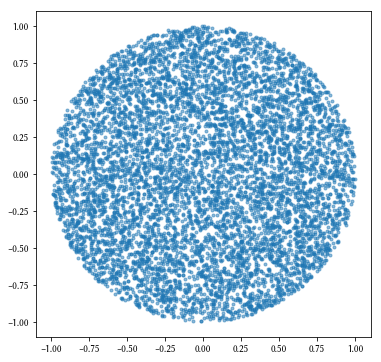

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in inside], [x[1] for x in inside], marker='.', alpha=0.5);

Finally, we can check our estimate of $\pi$ as the count divided by N and multiplied by 4:

In [4]:
4 * len(inside)/float(N)

3.1528

## Speed of convergence

Theory tells us that the convergence of a Monte Carlo procedure is related to the square root of the number of iterations. This means that the estimation error should decrease proportionally to the inverse of the square root of $N$, the number of iterations. 

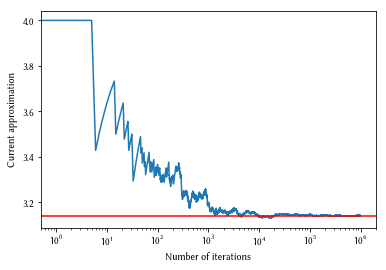

In [5]:
N = 1000000
inside = 0
approximation = numpy.empty(N)
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside += 1
    approximation[i] = 4 * inside/float(i+1)
plt.semilogx(approximation)
plt.xlabel("Number of iterations")
plt.ylabel("Current approximation")
plt.axhline(numpy.pi, color='r');

**Exercise**: let’s check that the error decreases proportionally to $\frac{1}{\sqrt{N}}$.

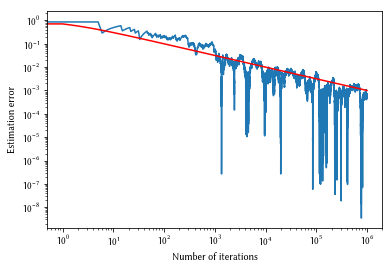

In [6]:
plt.loglog(numpy.arange(N), numpy.abs(approximation-numpy.pi))
plt.loglog(1/numpy.sqrt(numpy.arange(N)+1), color='r')
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error");

**Exercise**: use a similar Monte Carlo procedure in dimension 3 to estimate $\pi$ (your analysis will be based on the volume of a sphere of radius 1, instead of the area of a circle of radius 1). Recall that the volume of a sphere of radius $r$ is $\frac{4}{3}\pi r^3$.